In [1]:
# make sure that you have recent version of PyTorch installed
import torch
torch.__version__

'2.0.1+cpu'

In [2]:
# Simple Tensors

a = torch.tensor([[1,2],[3,4]])
print(a)
a = torch.randn(size=(10,3))
print(a)

tensor([[1, 2],
        [3, 4]])
tensor([[-0.9829,  0.3424, -0.6922],
        [-0.8964, -0.4266,  0.3782],
        [ 0.2547, -0.3908,  0.1500],
        [-0.1732, -0.5665,  0.1495],
        [ 0.6230,  1.6366, -0.4506],
        [-0.4469,  1.6773,  1.6652],
        [-0.3325, -0.3312,  0.9156],
        [ 0.8366, -0.9092,  0.4820],
        [-0.0655,  0.7852,  0.3079],
        [ 0.3369,  0.3893, -0.3994]])


In [3]:
print(a-a[0])
print(torch.exp(a)[0].numpy())  # extracts numpy-array from tensor

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.0865, -0.7690,  1.0704],
        [ 1.2376, -0.7332,  0.8422],
        [ 0.8097, -0.9089,  0.8417],
        [ 1.6059,  1.2942,  0.2416],
        [ 0.5360,  1.3349,  2.3574],
        [ 0.6504, -0.6736,  1.6078],
        [ 1.8195, -1.2516,  1.1742],
        [ 0.9173,  0.4428,  1.0001],
        [ 1.3198,  0.0469,  0.2928]])
[0.37423143 1.4083248  0.50047904]


In [4]:
# In-place and out-of-place Operations

u = torch.tensor(5)
print("Result when adding out-of-place:",u.add(torch.tensor(3)))
u.add_(torch.tensor(3))
print("Result after adding in-place:", u)

Result when adding out-of-place: tensor(8)
Result after adding in-place: tensor(8)


In [5]:
# sum or all rows in a matrix

s = torch.zeros_like(a[0])
for i in a:
  s.add_(i)

print(s)

tensor([-0.8461,  2.2065,  2.5062])


In [6]:
torch.sum(a,axis=0)

tensor([-0.8461,  2.2065,  2.5062])

In [7]:
# Computing Gradients

a = torch.randn(size=(2, 2), requires_grad=True)
b = torch.randn(size=(2, 2))

c = torch.mean(torch.sqrt(torch.square(a) + torch.square(b)))  # Do some math using `a`   -   tensor(2.2843, grad_fn=<MeanBackward0>) 

c.backward() # call backward() to compute all gradients
# This function triggers automatic differentiation and computes gradients for all tensors that were involved in the computation of c.
# In this case, it computes the gradient of c with respect to a.

# What's the gradient of `c` with respect to `a`?
print(a.grad)   # Tensor that contains the gradient values. These gradient values represent how a small change in each element of 'a' would affect the value of 'c'.


tensor([[ 0.1437,  0.2386],
        [-0.0186, -0.2377]])


In [8]:
c = torch.mean(torch.sqrt(torch.square(a) + torch.square(b)))
c.backward(retain_graph=True)
c.backward(retain_graph=True)
print(a.grad)
a.grad.zero_()  # to restart computing gradients from scratch, resets grad field to 0 explicitly
c.backward()
print(a.grad)


tensor([[ 0.4312,  0.7159],
        [-0.0558, -0.7132]])
tensor([[ 0.1437,  0.2386],
        [-0.0186, -0.2377]])


In [9]:
# For each tensor that has the requires_grad flag set to True,
# PyTorch maintains a special function called grad_fn, which computes the derivative of the expression according to chain differentiation rule

print(c)    # Here c is computed using mean function, thus grad_fn point to a function called MeanBackward.

tensor(1.8578, grad_fn=<MeanBackward0>)


In [10]:
# computing Jacobians
# if we want to compute the gradient of a tensor with respect to another tensor, PyTorch allows us to compute the product of a Jacobian matrix and a given vector.

c = torch.sqrt(torch.square(a) + torch.square(b))
c.backward(torch.eye(2)) # eye(2) means 2x2 identity matrix -    The size of v should be the same as the size of the original tensor, with respect to which we compute the gradient.
print(a.grad)

tensor([[ 0.7187,  0.2386],
        [-0.0186, -1.1886]])


In [11]:
# Optimization Using Gradient Descent

# Let's try to use automatic differentiation to find a minimum of a simple two-variable function f(x1, x2) = (x1-3)^2 + (x2+2)^2 .

# defining starting value of x and the function f
x = torch.zeros(2,requires_grad=True)
f = lambda x : (x-torch.tensor([3,-2])).pow(2).sum()
lr = 0.1

In [12]:
for i in range(15):
    y = f(x)
    y.backward()
    gr = x.grad
    x.data.add_(-lr*gr)
    x.grad.zero_()
    print("Step {}: x[0]={}, x[1]={}".format(i,x[0],x[1]))

# we are approaching the minimum point at (3,-2)

Step 0: x[0]=0.6000000238418579, x[1]=-0.4000000059604645
Step 1: x[0]=1.0800000429153442, x[1]=-0.7200000286102295
Step 2: x[0]=1.4639999866485596, x[1]=-0.9760000705718994
Step 3: x[0]=1.7711999416351318, x[1]=-1.1808000802993774
Step 4: x[0]=2.0169599056243896, x[1]=-1.3446400165557861
Step 5: x[0]=2.2135679721832275, x[1]=-1.4757120609283447
Step 6: x[0]=2.370854377746582, x[1]=-1.5805696249008179
Step 7: x[0]=2.4966835975646973, x[1]=-1.6644556522369385
Step 8: x[0]=2.597346782684326, x[1]=-1.7315645217895508
Step 9: x[0]=2.677877426147461, x[1]=-1.7852516174316406
Step 10: x[0]=2.7423019409179688, x[1]=-1.8282012939453125
Step 11: x[0]=2.793841600418091, x[1]=-1.8625609874725342
Step 12: x[0]=2.835073232650757, x[1]=-1.8900487422943115
Step 13: x[0]=2.868058681488037, x[1]=-1.912039041519165
Step 14: x[0]=2.894446849822998, x[1]=-1.929631233215332


In [13]:
# Linear Regression

# generating small synthetic dataset

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
import random

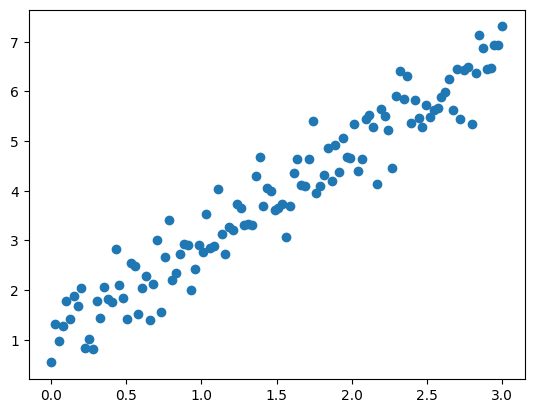

In [14]:
np.random.seed(13) # pick the seed for reproducibility - change it to explore the effects of random variations

train_x = np.linspace(0, 3, 120)
train_labels = 2 * train_x + 0.9 + np.random.randn(*train_x.shape) * 0.5    # at (*train_x.shape), * in the beginning of a function 
                                                                            # is used to unpack the elements of an iterable (e.g., a list, tuple, or array) 
                                                                            # and pass them as separate arguments to a function.
plt.scatter(train_x,train_labels)

In [15]:
# Let's define our model and loss function

input_dim = 1
output_dim = 1
learning_rate = 0.1

# This is our weight matrix
w = torch.tensor([100.0],requires_grad=True,dtype=torch.float32)
# This is our bias vector
b = torch.zeros(size=(output_dim,),requires_grad=True)

def f(x):
    return torch.matmul(x,w) + b

def compute_loss(labels, predictions):
    return torch.mean(torch.square(labels - predictions))

In [16]:
# training the model on a series of minibatches, uing gradient descent

def train_on_batch(x, y):
    predictions = f(x)
    loss = compute_loss(y, predictions)
    loss.backward()
    w.data.sub_(learning_rate * w.grad)
    b.data.sub_(learning_rate * b.grad)
    w.grad.zero_()
    b.grad.zero_()
    return loss

In [17]:
# Shuffle the data.
indices = np.random.permutation(len(train_x))
features = torch.tensor(train_x[indices],dtype=torch.float32)
labels = torch.tensor(train_labels[indices],dtype=torch.float32)


In [18]:
batch_size = 4
for epoch in range(10):
    for i in range(0,len(features),batch_size):
        loss = train_on_batch(features[i:i+batch_size].view(-1,1),labels[i:i+batch_size])   # .view() method is used to reshape a tensor while keeping the same data. 
                                                                                            # -1: It tells PyTorch to compute that dimension such that it maintains the total number of elements.
                                                                                            # 1: This specifies that you want the resulting tensor to have 1 column.
    print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 94.5247
Epoch 1: last batch loss = 9.3428
Epoch 2: last batch loss = 1.4166
Epoch 3: last batch loss = 0.5224
Epoch 4: last batch loss = 0.3807
Epoch 5: last batch loss = 0.3495
Epoch 6: last batch loss = 0.3413
Epoch 7: last batch loss = 0.3390
Epoch 8: last batch loss = 0.3384
Epoch 9: last batch loss = 0.3382


In [19]:
# obtained optimized parameters W and b
#  their values are similar to the original values used when generating the dataset (W = 2, b = 1)
w,b

(tensor([1.8617], requires_grad=True), tensor([1.0711], requires_grad=True))

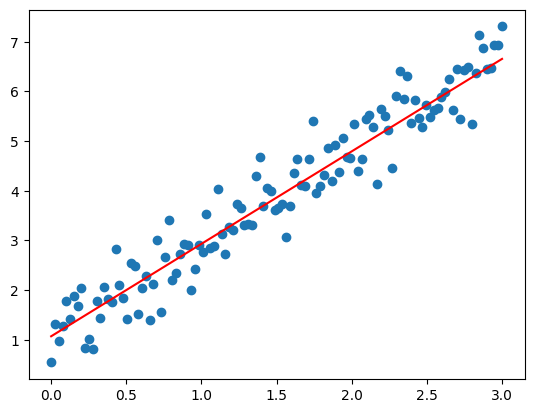

In [20]:
plt.scatter(train_x,train_labels)
x = np.array([min(train_x),max(train_x)])

# Disabling gradient calculation is useful for inference, when you are sure
# that you will not call Tensor.backward(). It will reduce memory consumption for computations that would otherwise have requires_grad=True.
with torch.no_grad():   
    y = w.numpy()*x+b.numpy()
plt.plot(x,y,color='red')

In [21]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print('Doing computations on '+device)

### Changes here: indicate device
w = torch.tensor([100.0],requires_grad=True,dtype=torch.float32,device=device)
b = torch.zeros(size=(output_dim,),requires_grad=True,device=device)

def f(x):
    return torch.matmul(x,w) + b

def compute_loss(labels, predictions):
    return torch.mean(torch.square(labels - predictions))

def train_on_batch(x, y):
    predictions = f(x)
    loss = compute_loss(y, predictions)
    loss.backward()
    w.data.sub_(learning_rate * w.grad)
    b.data.sub_(learning_rate * b.grad)
    w.grad.zero_()
    b.grad.zero_()
    return loss


batch_size = 4
for epoch in range(10):
    for i in range(0,len(features),batch_size):
        ### Changes here: move data to required device
        loss = train_on_batch(features[i:i+batch_size].view(-1,1).to(device),labels[i:i+batch_size].to(device)) # move all tensors to this device using a call .to(device)
    print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))


Doing computations on cpu
Epoch 0: last batch loss = 94.5247
Epoch 1: last batch loss = 9.3428
Epoch 2: last batch loss = 1.4166
Epoch 3: last batch loss = 0.5224
Epoch 4: last batch loss = 0.3807
Epoch 5: last batch loss = 0.3495
Epoch 6: last batch loss = 0.3413
Epoch 7: last batch loss = 0.3390
Epoch 8: last batch loss = 0.3384
Epoch 9: last batch loss = 0.3382


In [22]:
print(torch.version.cuda)

None


In [23]:
# Classification

# generating sample data
np.random.seed(0) # pick the seed for reproducibility - change it to explore the effects of random variations

n = 100
X, Y = make_classification(n_samples = n, n_features=2,
                           n_redundant=0, n_informative=2, flip_y=0.1,class_sep=1.5)
X = X.astype(np.float32)
Y = Y.astype(np.int32)

split = [ 70*n//100, (15+70)*n//100 ]   # The // operator is used for floor division
train_x, valid_x, test_x = np.split(X, split)   # X[0:69,:], X[70:84,:], X[85:99,:]
train_labels, valid_labels, test_labels = np.split(Y, split)    # Y[0:69,:], Y[70:84,:], Y[85:99,:]


In [24]:
def plot_dataset(features, labels, W=None, b=None):
    # prepare the plot
    fig, ax = plt.subplots(1,1)
    ax.set_xlabel('$x_i[0]$ -- (feature 1)')
    ax.set_ylabel('$x_i[1]$ -- (feature 2)')
    colors = ['r' if l else 'b' for l in labels]
    ax.scatter(features[:, 0], features[:, 1], marker='o', c=colors, s=100, alpha=0.5)
    if W is not None:
        min_x = min(features[:,0])
        max_x = max(features[:,0])
        min_y = min(features[:,1])*(1-.1)   # equivalent to *(1-0.1) = *(0.9)
        max_y = max(features[:,1])*(1+.1)   # equivalent to *(1+0.1) = *(1.1)
        cx = np.array([min_x, max_x],dtype=np.float32)
        cy = (0.5-W[0]*cx-b)/W[1]
        ax.plot(cx,cy,'g')
        ax.set_ylim(min_y,max_y)
    fig.show()

C:\Users\User\AppData\Local\Temp\ipykernel_17440\1674085984.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


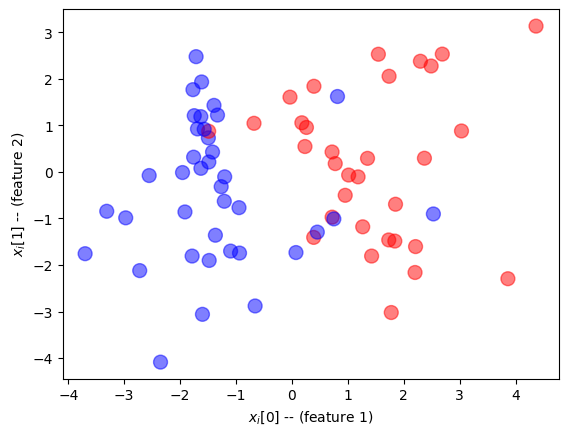

In [25]:
plot_dataset(train_x,train_labels)

In [26]:
# Training One-Layer Perceptron

class Network():
  def __init__(self):
     self.W = torch.randn(size=(2,1),requires_grad=True)
     self.b = torch.zeros(size=(1,),requires_grad=True)

  def forward(self,x):
    return torch.matmul(x,self.W)+self.b

  def zero_grad(self):
    self.W.data.zero_() # used W.data.zero_() instead of W.zero_(), because we cannot directly modify a tensor that is being tracked using Autograd mechanism.
    self.b.data.zero_()

  def update(self,lr=0.1):
    self.W.data.sub_(lr*self.W.grad)
    self.b.data.sub_(lr*self.b)

net = Network()

In [27]:
# The call to binary_cross_entropy_with_logits is equivalent to a call to sigmoid, followed by a call to binary_crossentropy

def train_on_batch(net, x, y):
    z = net.forward(x).flatten()
    loss = torch.nn.functional.binary_cross_entropy_with_logits(input=z,target=y)   # nn stands for 'neural network'
    net.zero_grad()
    loss.backward()
    net.update()
    return loss

In [28]:
# Dataset is the main source of data, it can be either Iterable or Map-style
# Dataloader is responsible for loading the data from a dataset and splitting it into minibatches.

# Create a tf.data.Dataset object for easy batched iteration
dataset = torch.utils.data.TensorDataset(torch.tensor(train_x),torch.tensor(train_labels,dtype=torch.float32))
dataloader = torch.utils.data.DataLoader(dataset,batch_size=16)

list(dataloader)[0]

[tensor([[ 1.5442,  2.5290],
         [-1.6284,  0.0772],
         [-1.7141,  2.4770],
         [-1.4951,  0.7320],
         [-1.6899,  0.9243],
         [-0.9474, -0.7681],
         [ 3.8597, -2.2951],
         [-1.3944,  1.4300],
         [ 4.3627,  3.1333],
         [-1.0973, -1.7011],
         [-2.5532, -0.0777],
         [-1.2661, -0.3167],
         [ 0.3921,  1.8406],
         [ 2.2091, -1.6045],
         [ 1.8383, -1.4861],
         [ 0.7173, -0.9718]]),
 tensor([1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1.])]

In [29]:
for epoch in range(15):
    for (x, y) in dataloader:
        loss = train_on_batch(net,x,y)
    print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))

Epoch 0: last batch loss = 0.5701
Epoch 1: last batch loss = 0.4662
Epoch 2: last batch loss = 0.4024
Epoch 3: last batch loss = 0.3590
Epoch 4: last batch loss = 0.3276
Epoch 5: last batch loss = 0.3035
Epoch 6: last batch loss = 0.2844
Epoch 7: last batch loss = 0.2688
Epoch 8: last batch loss = 0.2558
Epoch 9: last batch loss = 0.2446
Epoch 10: last batch loss = 0.2350
Epoch 11: last batch loss = 0.2266
Epoch 12: last batch loss = 0.2192
Epoch 13: last batch loss = 0.2125
Epoch 14: last batch loss = 0.2065


In [30]:
print(net.W,net.b)

tensor([[1.3880],
        [0.3591]], requires_grad=True) tensor([0.], requires_grad=True)


C:\Users\User\AppData\Local\Temp\ipykernel_17440\1674085984.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


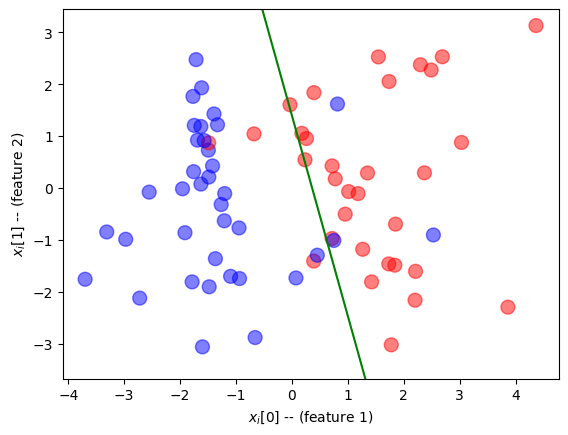

In [31]:
# plotting the line that separates two classes
# Separation line is defined by the equation W * x + b = 0.5 

plot_dataset(train_x,train_labels,net.W.detach().numpy(),net.b.detach().numpy())    
# .detach(): This function is used to create a new tensor that shares data with the original tensor (net.W) but doesn't require gradients to be computed.

In [32]:
# computes accuracy on the validation dataset

pred = torch.sigmoid(net.forward(torch.tensor(valid_x)))    # A "sigmoid" is a mathematical function that maps any real-valued number to a value between 0 and 1.
torch.mean(((pred.view(-1)>0.5)==(torch.tensor(valid_labels)>0.5)).type(torch.float32))


tensor(0.8000)

In [33]:
# Neural Networks and Optimizers

# There are two methods to define your own neural network:
#   Sequential, where you just specify a list of layers that comprise your network
#   As a class inherited from torch.nn.Module

# Most of the activation function and loss functions in PyTorch are available in two form: 
#   as a function (inside torch.nn.functional namespace) 
#   as a layer (inside torch.nn namespace)

# training one-layer perceptron
net = torch.nn.Linear(2,1) # 2 inputs, 1 output

print(list(net.parameters()))   # weight matrix M and bias b

[Parameter containing:
tensor([[-0.3722,  0.0675]], requires_grad=True), Parameter containing:
tensor([0.2521], requires_grad=True)]


In [34]:
# stochastic gradient descent optimizer
optim = torch.optim.SGD(net.parameters(),lr=0.05)

In [35]:
# training loop

val_x = torch.tensor(valid_x)
val_lab = torch.tensor(valid_labels)

for ep in range(10):
    for (x,y) in dataloader:
        z = net(x).flatten()    # net(x) instead of net.forward(x), because nn.Module implements Python __call__() function
        loss = torch.nn.functional.binary_cross_entropy_with_logits(z,y)
        optim.zero_grad()
        loss.backward()
        optim.step()    # parameter update
    acc = ((torch.sigmoid(net(val_x).flatten())>0.5).float()==val_lab).float().mean()
    print(f"Epoch {ep}: last batch loss = {loss}, val acc = {acc}")

Epoch 0: last batch loss = 0.8542512059211731, val acc = 0.3333333432674408
Epoch 1: last batch loss = 0.7200689315795898, val acc = 0.46666666865348816
Epoch 2: last batch loss = 0.6230071783065796, val acc = 0.7333333492279053
Epoch 3: last batch loss = 0.5515496730804443, val acc = 0.8666666746139526
Epoch 4: last batch loss = 0.4974711239337921, val acc = 0.800000011920929
Epoch 5: last batch loss = 0.45538341999053955, val acc = 0.800000011920929
Epoch 6: last batch loss = 0.4217906892299652, val acc = 0.800000011920929
Epoch 7: last batch loss = 0.3943839371204376, val acc = 0.800000011920929
Epoch 8: last batch loss = 0.37159860134124756, val acc = 0.800000011920929
Epoch 9: last batch loss = 0.3523458242416382, val acc = 0.800000011920929


In [36]:
# generic train function

def train(net, dataloader, val_x, val_lab, epochs=10, lr=0.05, loss_func=torch.nn.functional.binary_cross_entropy_with_logits):
    epoch_data = []
    optim = torch.optim.Adam(net.parameters(), lr=lr)   # Adam stands for "Adaptive Moment Estimation,"
                                                        # combines Adagrad and RMSprop techniques
                                                        # adaptive learning rates for each parameter
    for ep in range(epochs):
        for (x,y) in dataloader:
            z = net(x).flatten()
            loss = loss_func(z,y)
            optim.zero_grad()
            loss.backward()
            optim.step()
        acc = ((torch.sigmoid(net(val_x).flatten())>0.5).float()==val_lab).float().mean()
        epoch_data.append([loss,acc])
        print(f"Epoch {ep}: last batch loss = {loss}, val acc = {acc}")

    return epoch_data

net = torch.nn.Linear(2,1)

train(net,dataloader,val_x,val_lab,lr=0.03)
    

Epoch 0: last batch loss = 0.6357288956642151, val acc = 0.6666666865348816
Epoch 1: last batch loss = 0.517389714717865, val acc = 0.7333333492279053
Epoch 2: last batch loss = 0.42661163210868835, val acc = 0.800000011920929
Epoch 3: last batch loss = 0.35987600684165955, val acc = 0.800000011920929
Epoch 4: last batch loss = 0.31175974011421204, val acc = 0.800000011920929
Epoch 5: last batch loss = 0.2770056426525116, val acc = 0.800000011920929
Epoch 6: last batch loss = 0.25146618485450745, val acc = 0.800000011920929
Epoch 7: last batch loss = 0.23220427334308624, val acc = 0.800000011920929
Epoch 8: last batch loss = 0.217252716422081, val acc = 0.800000011920929
Epoch 9: last batch loss = 0.20532192289829254, val acc = 0.800000011920929


[[tensor(0.6357, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.6667)],
 [tensor(0.5174, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.7333)],
 [tensor(0.4266, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.8000)],
 [tensor(0.3599, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.8000)],
 [tensor(0.3118, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.8000)],
 [tensor(0.2770, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.8000)],
 [tensor(0.2515, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.8000)],
 [tensor(0.2322, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.8000)],
 [tensor(0.2173, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.8000)],
 [tensor(0.2053, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.8000)]]

In [37]:
# Defining Network as a Sequence of Layers
net = torch.nn.Sequential(torch.nn.Linear(2,5),torch.nn.Sigmoid(),torch.nn.Linear(5,1))
print(net)

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=5, out_features=1, bias=True)
)


In [38]:
train(net,dataloader,val_x,val_lab)

Epoch 0: last batch loss = 0.6562293171882629, val acc = 0.800000011920929
Epoch 1: last batch loss = 0.5772157311439514, val acc = 0.800000011920929
Epoch 2: last batch loss = 0.4823799431324005, val acc = 0.800000011920929
Epoch 3: last batch loss = 0.38560500741004944, val acc = 0.800000011920929
Epoch 4: last batch loss = 0.2975935935974121, val acc = 0.800000011920929
Epoch 5: last batch loss = 0.2260218858718872, val acc = 0.800000011920929
Epoch 6: last batch loss = 0.17051130533218384, val acc = 0.800000011920929
Epoch 7: last batch loss = 0.12924429774284363, val acc = 0.800000011920929
Epoch 8: last batch loss = 0.10106980800628662, val acc = 0.800000011920929
Epoch 9: last batch loss = 0.08326981961727142, val acc = 0.800000011920929


[[tensor(0.6562, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.8000)],
 [tensor(0.5772, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.8000)],
 [tensor(0.4824, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.8000)],
 [tensor(0.3856, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.8000)],
 [tensor(0.2976, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.8000)],
 [tensor(0.2260, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.8000)],
 [tensor(0.1705, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.8000)],
 [tensor(0.1292, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.8000)],
 [tensor(0.1011, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.8000)],
 [tensor(0.0833, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.8000)]]

In [39]:
# Defining a Network as a Class
class MyNet(torch.nn.Module):   # inherited from torch.nn.Module
    def __init__(self,hidden_size=10,func=torch.nn.Sigmoid()):
        super().__init__()
        self.fc1 = torch.nn.Linear(2,hidden_size)
        self.func = func
        self.fc2 = torch.nn.Linear(hidden_size,1)

    def forward(self,x):
        x = self.fc1(x)
        x = self.func(x)
        x = self.fc2(x)
        return torch.Tensor(x)  # Make sure x is a tensor

net = MyNet(func=torch.nn.ReLU())
print(net)

MyNet(
  (fc1): Linear(in_features=2, out_features=10, bias=True)
  (func): ReLU()
  (fc2): Linear(in_features=10, out_features=1, bias=True)
)


In [40]:
train(net,dataloader,val_x,val_lab,lr=0.005)

Epoch 0: last batch loss = 0.6670229434967041, val acc = 0.5333333611488342
Epoch 1: last batch loss = 0.6374803185462952, val acc = 0.5333333611488342
Epoch 2: last batch loss = 0.6094790101051331, val acc = 0.6000000238418579
Epoch 3: last batch loss = 0.5831548571586609, val acc = 0.6666666865348816
Epoch 4: last batch loss = 0.5582507252693176, val acc = 0.6666666865348816
Epoch 5: last batch loss = 0.535068929195404, val acc = 0.6666666865348816
Epoch 6: last batch loss = 0.5112147927284241, val acc = 0.6000000238418579
Epoch 7: last batch loss = 0.48728346824645996, val acc = 0.6000000238418579
Epoch 8: last batch loss = 0.46333351731300354, val acc = 0.6000000238418579
Epoch 9: last batch loss = 0.43937674164772034, val acc = 0.6666666865348816


[[tensor(0.6670, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.5333)],
 [tensor(0.6375, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.5333)],
 [tensor(0.6095, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.6000)],
 [tensor(0.5832, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.6667)],
 [tensor(0.5583, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.6667)],
 [tensor(0.5351, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.6667)],
 [tensor(0.5112, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.6000)],
 [tensor(0.4873, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.6000)],
 [tensor(0.4633, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.6000)],
 [tensor(0.4394, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>),
  tensor(0.6667)]]

Epoch 0: last batch loss = 0.7446527481079102, val acc = 0.4000000059604645
Epoch 1: last batch loss = 0.695296049118042, val acc = 0.4000000059604645
Epoch 2: last batch loss = 0.6476375460624695, val acc = 0.6666666865348816
Epoch 3: last batch loss = 0.6014389395713806, val acc = 0.7333333492279053
Epoch 4: last batch loss = 0.5569510459899902, val acc = 0.7333333492279053
Epoch 5: last batch loss = 0.5144757628440857, val acc = 0.800000011920929
Epoch 6: last batch loss = 0.4742271602153778, val acc = 0.800000011920929
Epoch 7: last batch loss = 0.4363262355327606, val acc = 0.800000011920929
Epoch 8: last batch loss = 0.4009028673171997, val acc = 0.800000011920929
Epoch 9: last batch loss = 0.3681187331676483, val acc = 0.800000011920929


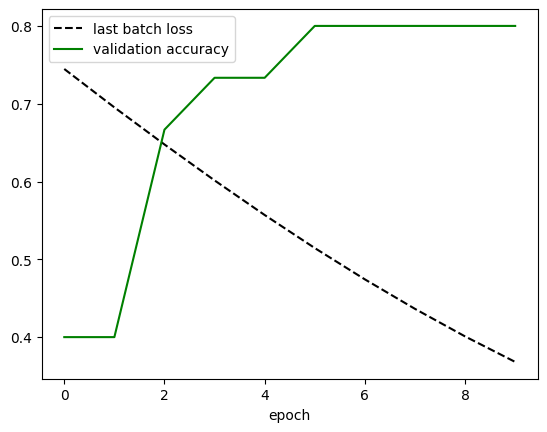

In [41]:
# Plotes the graphs of loss function and accuracy and validation data during training
def plot_training_loss_acc(loss_acc):
    fig, ax = plt.subplots(1,1)
    ax.set_xlabel('epoch')
    ax.legend(ax.lines, ['last batch loss', 'validation accuracy'], loc='upper center', ncol = 2)

    loss_list=[]
    acc_list=[]
    for epoch in loss_acc:
        try:
            loss_list.append(epoch[0].detach_())
        except AttributeError:
            loss_list.append(epoch[0])
        try:
            acc_list.append(epoch[1].detach_())
        except AttributeError:
            acc_list.append(epoch[1]) 

    ax.plot(range(len(loss_acc)), loss_list, 'k--', label='last batch loss')
    ax.plot(range(len(loss_acc)), acc_list, 'g-', label='validation accuracy')

    plt.legend()
    plt.show()

net = MyNet(func=torch.nn.ReLU())
loss_acc=train(net,dataloader,val_x,val_lab,lr=0.005)
plot_training_loss_acc(loss_acc)

In [42]:
# Solves MNIST classificiation problem using this code. Uses crossentropy_with_logits as a loss function.

import gzip
import pickle
import sys

with gzip.open('mnist.pkl.gz', 'rb') as mnist_pickle:   
    # If the Python version is greater than 2, it uses the encoding='latin1' parameter when calling pickle.load()
    # In Python 3.x, the pickle module expects Unicode strings by default, and the 'latin1' encoding ensures that the binary data is loaded correctly.                              
    if sys.version_info.major > 2:
        MNIST = pickle.load(mnist_pickle, encoding='latin1')
    # If the Python version is 2.x or lower, the code falls back to the regular pickle.load() without specifying the encoding parameter.     
    else:          
        MNIST = pickle.load(mnist_pickle)

In [43]:
from sklearn.model_selection import train_test_split

labels = MNIST[0][1]    # MNIST['Train']['Labels']
features = MNIST[0][0]  # MNIST['Train']['Features']

features_train, features_test, labels_train, labels_test = train_test_split(features,labels,test_size=0.2, shuffle=True)


In [44]:
num_classes = 10

one_hot_labels = torch.nn.functional.one_hot(torch.tensor(labels_train), num_classes=num_classes)

mnist_dataset = torch.utils.data.TensorDataset(torch.tensor(features_train),torch.tensor(one_hot_labels,dtype=torch.float32))
mnist_dataloader = torch.utils.data.DataLoader(mnist_dataset,batch_size=192)

list(mnist_dataloader)[0]

C:\Users\User\AppData\Local\Temp\ipykernel_17440\156136733.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mnist_dataset = torch.utils.data.TensorDataset(torch.tensor(features_train),torch.tensor(one_hot_labels,dtype=torch.float32))


[tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([[1., 0., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [1., 0., 0.,  ..., 0., 0., 0.]])]

In [45]:
# Defining a Network as a Class
class MyNetMnist(torch.nn.Module):   # inherited from torch.nn.Module
    def __init__(self,hidden_size1=30,func=torch.nn.ReLU()):
        super().__init__()
        self.fc1 = torch.nn.Linear(784,hidden_size1)
        self.func = func
        self.fc2 = torch.nn.Linear(hidden_size1,10)

    def forward(self,x):
        x = self.fc1(x)
        x = self.func(x)
        x = self.fc2(x)
        return torch.Tensor(x)  # Make sure x is a tensor

net = MyNetMnist(func=torch.nn.ReLU())
print(net)

MyNetMnist(
  (fc1): Linear(in_features=784, out_features=30, bias=True)
  (func): ReLU()
  (fc2): Linear(in_features=30, out_features=10, bias=True)
)


In [46]:
def train_mnist(net, dataloader, val_x, val_lab, epochs=10, lr=0.05):

    epoch_data = []
    optim = torch.optim.Adam(net.parameters(), lr=lr)

    for ep in range(epochs):
        for (x, y) in dataloader:
            optim.zero_grad()
            z = net(x)
            loss = torch.nn.functional.cross_entropy(z, y) 
            loss.backward()
            optim.step()

        # Calculate validation accuracy
        with torch.no_grad():
            predictions = net(val_x)
           
            val_acc = calculate_mnist_accuracy(predictions, val_lab)
        
        epoch_data.append([loss,val_acc])
        print(f"Epoch {ep}: last batch loss = {loss}, val acc = {val_acc}")

    return epoch_data

In [47]:
def calculate_mnist_accuracy(predictions,val_lab):
    count = 0.0
    for i in range(predictions.size()[0]):
        predict = predictions[i].argmax()
        if (predict == val_lab[i]):
            count += 1
    return count/predictions.size()[0]

Epoch 0: last batch loss = 0.13462598621845245, val acc = 0.9292
Epoch 1: last batch loss = 0.07800685614347458, val acc = 0.9437
Epoch 2: last batch loss = 0.051601480692625046, val acc = 0.948
Epoch 3: last batch loss = 0.02936502918601036, val acc = 0.947
Epoch 4: last batch loss = 0.02658400870859623, val acc = 0.9489
Epoch 5: last batch loss = 0.013877863995730877, val acc = 0.9494
Epoch 6: last batch loss = 0.014369850046932697, val acc = 0.9509
Epoch 7: last batch loss = 0.0061792549677193165, val acc = 0.9483
Epoch 8: last batch loss = 0.010829693637788296, val acc = 0.9503
Epoch 9: last batch loss = 0.0031242817640304565, val acc = 0.9537


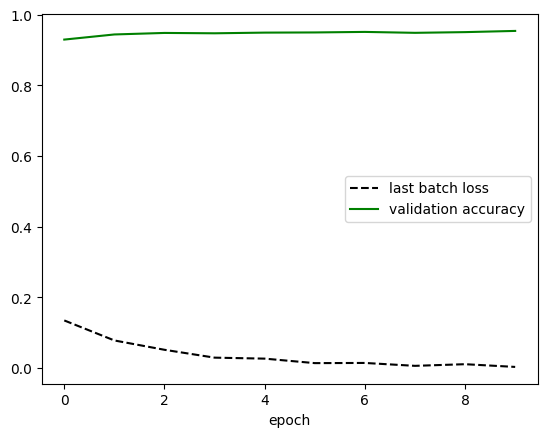

In [48]:
feat_tensor = torch.tensor(features_test)
lab_tensor = torch.tensor(labels_test, dtype=float)

loss_acc=train_mnist(net,mnist_dataloader,feat_tensor,lab_tensor,lr=0.01)

plot_training_loss_acc(loss_acc)

In [49]:
# Defining a Network as PyTorch Lightning Module

import pytorch_lightning as pl

In [50]:
class MyNetPL(pl.LightningModule):
    def __init__(self, hidden_size = 10, func = torch.nn.Sigmoid()):
        super().__init__()
        self.fc1 = torch.nn.Linear(2,hidden_size)
        self.func = func
        self.fc2 = torch.nn.Linear(hidden_size,1)

        self.val_epoch_num = 0 # for logging

    def forward(self, x):
        x = self.fc1(x)
        x = self.func(x)
        x = self.fc2(x)
        return x

    def training_step(self, batch, batch_nb):
        x, y = batch
        y_res = self(x).view(-1)
        loss = torch.nn.functional.binary_cross_entropy_with_logits(y_res, y)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr = 0.005)  # Stochastic Gradient Descent
        return optimizer
    
    def validation_step(self, batch, batch_nb):
        x, y = batch
        y_res = self(x).view(-1)
        val_loss = torch.nn.functional.binary_cross_entropy_with_logits(y_res, y)
        print("Epoch ", self.val_epoch_num, ": val loss = ", val_loss.item(), " val acc = ",((torch.sigmoid(y_res.flatten())>0.5).float()==y).float().mean().item(),  sep = "")
        self.val_epoch_num += 1

In [51]:
valid_dataset = torch.utils.data.TensorDataset(torch.tensor(valid_x),torch.tensor(valid_labels,dtype=torch.float32))
valid_dataloader = torch.utils.data.DataLoader(valid_dataset, batch_size = 16)

In [52]:
torch.cuda.is_available()   # My graphics card does not support CUDA

False

In [53]:
net = MyNetPL(func=torch.nn.ReLU())
trainer = pl.Trainer(max_epochs = 30, log_every_n_steps = 1, devices=1)  # implemented through an object of the Trainer class, which essentially "mixes" the model with any datasets.
trainer.fit(model = net, train_dataloaders = dataloader, val_dataloaders = valid_dataloader)


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type   | Params
--------------------------------
0 | fc1  | Linear | 30    
1 | func | ReLU   | 0     
2 | fc2  | Linear | 11    
--------------------------------
41        Trainable params
0         Non-trainable params
41        Total params
0.000     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Epoch 0: val loss = 0.7554184198379517 val acc = 0.3333333432674408


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:442: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:442: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch 1: val loss = 0.7471545934677124 val acc = 0.3333333432674408


Validation: 0it [00:00, ?it/s]

Epoch 2: val loss = 0.7392627596855164 val acc = 0.3333333432674408


Validation: 0it [00:00, ?it/s]

Epoch 3: val loss = 0.7316997051239014 val acc = 0.3333333432674408


Validation: 0it [00:00, ?it/s]

Epoch 4: val loss = 0.7244701385498047 val acc = 0.3333333432674408


Validation: 0it [00:00, ?it/s]

Epoch 5: val loss = 0.7175554037094116 val acc = 0.3333333432674408


Validation: 0it [00:00, ?it/s]

Epoch 6: val loss = 0.7109320163726807 val acc = 0.3333333432674408


Validation: 0it [00:00, ?it/s]

Epoch 7: val loss = 0.704568088054657 val acc = 0.46666666865348816


Validation: 0it [00:00, ?it/s]

Epoch 8: val loss = 0.6984495520591736 val acc = 0.46666666865348816


Validation: 0it [00:00, ?it/s]

Epoch 9: val loss = 0.6926054358482361 val acc = 0.46666666865348816


Validation: 0it [00:00, ?it/s]

Epoch 10: val loss = 0.6869792342185974 val acc = 0.46666666865348816


Validation: 0it [00:00, ?it/s]

Epoch 11: val loss = 0.6815592646598816 val acc = 0.5333333611488342


Validation: 0it [00:00, ?it/s]

Epoch 12: val loss = 0.6763757467269897 val acc = 0.6000000238418579


Validation: 0it [00:00, ?it/s]

Epoch 13: val loss = 0.6714256405830383 val acc = 0.7333333492279053


Validation: 0it [00:00, ?it/s]

Epoch 14: val loss = 0.6666844487190247 val acc = 0.7333333492279053


Validation: 0it [00:00, ?it/s]

Epoch 15: val loss = 0.6621516346931458 val acc = 0.7333333492279053


Validation: 0it [00:00, ?it/s]

Epoch 16: val loss = 0.6578187942504883 val acc = 0.800000011920929


Validation: 0it [00:00, ?it/s]

Epoch 17: val loss = 0.6536247730255127 val acc = 0.8666666746139526


Validation: 0it [00:00, ?it/s]

Epoch 18: val loss = 0.6495705842971802 val acc = 0.8666666746139526


Validation: 0it [00:00, ?it/s]

Epoch 19: val loss = 0.6456567645072937 val acc = 0.800000011920929


Validation: 0it [00:00, ?it/s]

Epoch 20: val loss = 0.6418784856796265 val acc = 0.800000011920929


Validation: 0it [00:00, ?it/s]

Epoch 21: val loss = 0.6382129192352295 val acc = 0.800000011920929


Validation: 0it [00:00, ?it/s]

Epoch 22: val loss = 0.6346679925918579 val acc = 0.800000011920929


Validation: 0it [00:00, ?it/s]

Epoch 23: val loss = 0.6312316060066223 val acc = 0.800000011920929


Validation: 0it [00:00, ?it/s]

Epoch 24: val loss = 0.627902626991272 val acc = 0.800000011920929


Validation: 0it [00:00, ?it/s]

Epoch 25: val loss = 0.6246788501739502 val acc = 0.800000011920929


Validation: 0it [00:00, ?it/s]

Epoch 26: val loss = 0.6215543746948242 val acc = 0.800000011920929


Validation: 0it [00:00, ?it/s]

Epoch 27: val loss = 0.6185197234153748 val acc = 0.800000011920929


Validation: 0it [00:00, ?it/s]

Epoch 28: val loss = 0.6155961751937866 val acc = 0.800000011920929


Validation: 0it [00:00, ?it/s]

Epoch 29: val loss = 0.6127569079399109 val acc = 0.800000011920929


Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.


Epoch 30: val loss = 0.6100025177001953 val acc = 0.800000011920929
